In [42]:
import pandas as pd


file_path = 'F:/FYP project/FYP(Flood)/Example Datasets/data4.csv'
df = pd.read_csv(file_path)


print(df.head())
print(df.info())
print(df.describe())


   Year  Month  Day 0830-0900 0900-1000 1000-1100 1100-1200 1200-1300  \
0  2021  April    1         0         0         0         0         0   
1  2021  April    2         0         0         0         0         0   
2  2021  April    3         0         0         0         0         0   
3  2021  April    4         0         0         0         0         0   
4  2021  April    5         0         0         0         0         0   

  1300-1400 1400-1500  ... 0100-0200 0200-0300 0300-0400 0400-0500 0500-0600  \
0         0         0  ...         0         0         0         0         0   
1         0         0  ...         0         0         0         0         0   
2         0         0  ...         0         0         0         0         0   
3         0         0  ...         0         0         0         0         0   
4         0         0  ...         0         0         0         0         0   

  0600-0700 0700-0800 0800-0830 Daily ROB Total  
0         0         0         

In [43]:
# Check for missing values
#print(df.isnull().sum())

# Handle missing values by filling them or removing rows/columns with missing data
df.fillna(0, inplace=True)  # Filling missing values with 0 for rainfall data

# Ensure all time columns are numeric
time_columns = ['0830-0900', '0900-1000', '1000-1100', '1100-1200', '1200-1300', '1300-1400', 
                '1400-1500', '1500-1600', '1600-1700', '1700-1800', '1800-1900', '1900-2000', 
                '2000-2100', '2100-2200', '2200-2300', '2300-2400', '0000-0100', '0100-0200', 
                '0200-0300', '0300-0400', '0400-0500', '0500-0600', '0600-0700', '0700-0800', 
                '0800-0830']
df[time_columns] = df[time_columns].apply(pd.to_numeric, errors='coerce').fillna(0)


In [44]:
# Convert month names to numeric values if not already done
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df['Month'] = df['Month'].map(month_map)

# Combine Year, Month, and Day into a single datetime column
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df['Day_of_Week'] = df['Date'].dt.day_name()
df['Hour'] = df['Date'].dt.hour


In [45]:
# Summary statistics for rainfall
rainfall_stats = df[time_columns].describe()
print(rainfall_stats)


        0830-0900   0900-1000   1000-1100   1100-1200   1200-1300   1300-1400  \
count  244.000000  244.000000  244.000000  244.000000  244.000000  244.000000   
mean     0.191803    0.300000    0.428689    0.479098    0.625410    0.867213   
std      1.075549    1.514973    1.808074    1.974574    2.683636    4.233483   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max     10.700000   17.200000   13.500000   18.100000   30.000000   53.200000   

        1400-1500   1500-1600   1600-1700   1700-1800  ...   2300-2400  \
count  244.000000  244.000000  244.000000  244.000000  ...  244.000000   
mean     0.904918    1.259836    1.506967    1.416393  ...    0.255328   
std      3.635113    4.375524    5.863930    5.3

13-14, 14-15, 15-16, 16-17, 17-18

analyse time period hourly of a day =  13-18

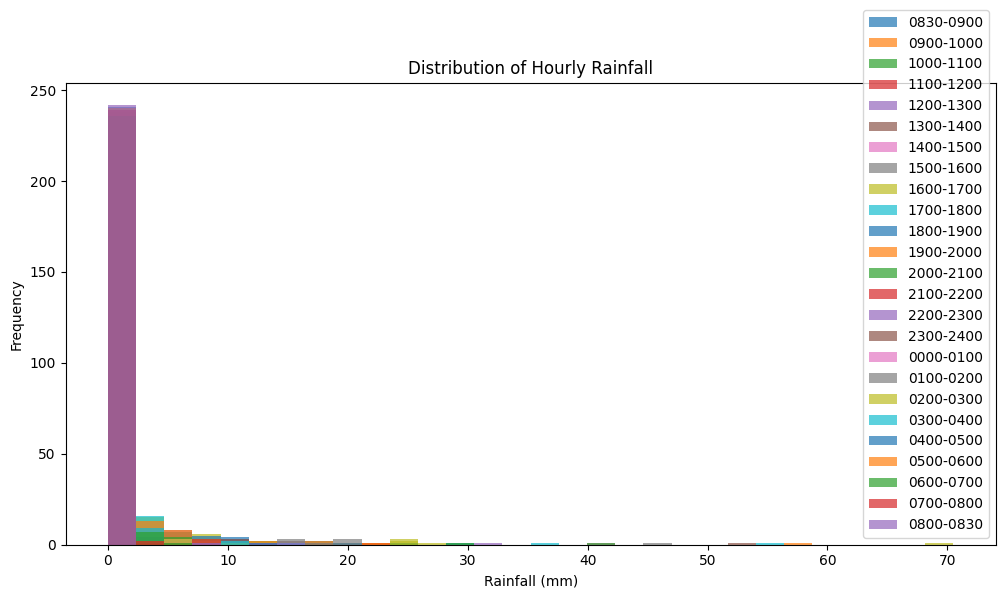

In [46]:
import matplotlib.pyplot as plt

# Plot histograms for each time slot
df[time_columns].plot(kind='hist', bins=30, figsize=(12, 6), alpha=0.7)
plt.title('Distribution of Hourly Rainfall')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')
plt.legend(time_columns)
plt.show()


<Figure size 1400x800 with 0 Axes>

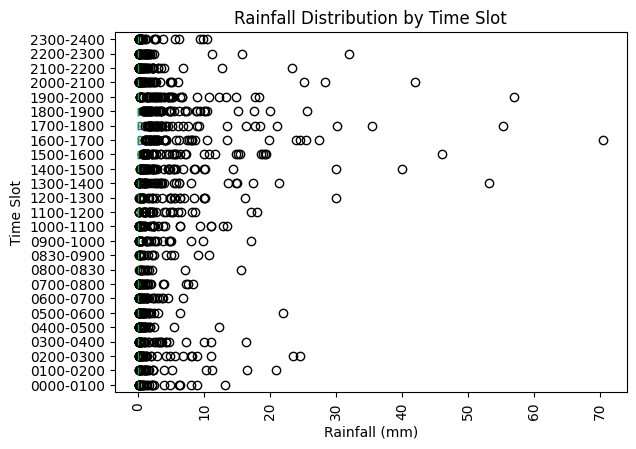

In [47]:
# Melt the DataFrame to long format for time series plotting
df_melted = df.melt(id_vars=['Date'], value_vars=time_columns, var_name='Time', value_name='Rainfall')

plt.figure(figsize=(14, 8))
df_melted.boxplot(column='Rainfall', by='Time', grid=False, vert=False)
plt.title('Rainfall Distribution by Time Slot')
plt.suptitle('')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Time Slot')
plt.xticks(rotation=90)
plt.show()


analyse:

16-17 time max rainfall

19-20, 17-18, 13-14, 15-16, 20-21, 14-15, 17-18

heavy ranfall time period - 13-21

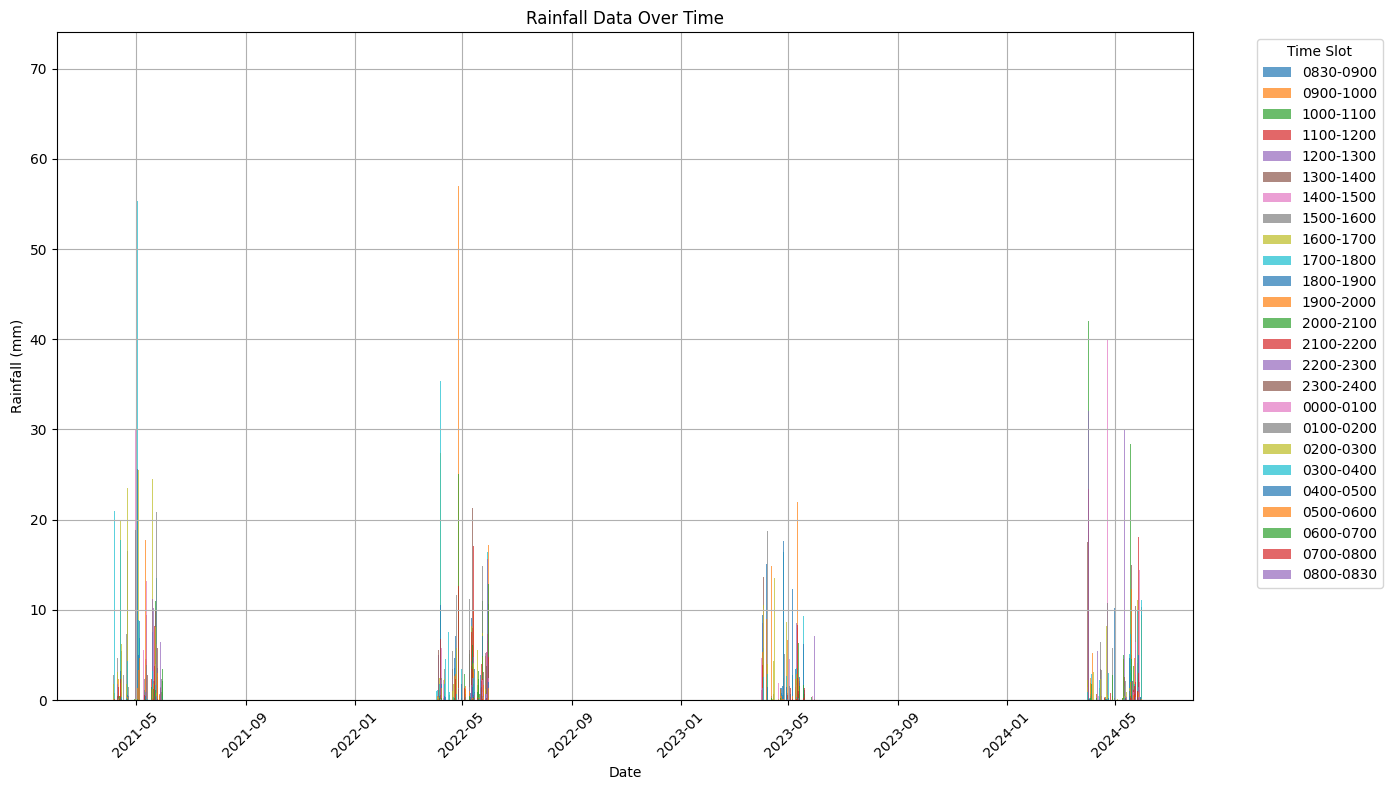

In [48]:

import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the provided CSV file
file_path = 'F:/FYP project/FYP(Flood)/Example Datasets/data4.csv'
df = pd.read_csv(file_path)

# Convert month names to numeric values
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df['Month'] = df['Month'].map(month_map)

# Combine Year, Month, and Day into a single datetime column
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Handle missing data: Fill missing values with 0 (assuming no rainfall)
time_columns = ['0830-0900', '0900-1000', '1000-1100', '1100-1200', '1200-1300', '1300-1400', 
                '1400-1500', '1500-1600', '1600-1700', '1700-1800', '1800-1900', '1900-2000', 
                '2000-2100', '2100-2200', '2200-2300', '2300-2400', '0000-0100', '0100-0200', 
                '0200-0300', '0300-0400', '0400-0500', '0500-0600', '0600-0700', '0700-0800', 
                '0800-0830']
df[time_columns] = df[time_columns].fillna(0)

# Ensure that all time columns are numeric
df[time_columns] = df[time_columns].apply(pd.to_numeric, errors='coerce').fillna(0)

# Melt the DataFrame to long format for easier plotting
df_melted = df.melt(id_vars=['Date'], value_vars=time_columns, var_name='Time', value_name='Rainfall')

# Plotting the data
plt.figure(figsize=(14, 8))
for time in time_columns:
    time_data = df_melted[df_melted['Time'] == time]
    plt.bar(time_data['Date'], time_data['Rainfall'], label=time, alpha=0.7)

plt.title('Rainfall Data Over Time')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.xticks(rotation=45)
plt.legend(title='Time Slot', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


analyse:

2022 end of the april

2021 begin of the may

2024 start and end of april

